# Collinear features

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from rfpimp import *
from sklearn.model_selection import train_test_split

In [22]:
df = pd.read_csv("data/rent.csv")
features = ['bathrooms','bedrooms','longitude','latitude', 'price']
df = df[features].copy()

# Clip to remove outliers
df = df[(df['latitude']>40.55) & (df['latitude']<40.94) &
        (df['longitude']>-74.1) & (df['longitude']<-73.67)]
df = df[(df.price>1_000) & (df.price<10_000)]

df_train, df_test = train_test_split(df, test_size=0.2)
X_train = df_train[['bedrooms','bathrooms','latitude','longitude']]
y_train = df_train['price']
X_test = df_test[['bedrooms','bathrooms','latitude','longitude']]
y_test = df_test['price']

rf = RandomForestRegressor(oob_score=True, n_estimators=100, n_jobs=-1)

## Drop column

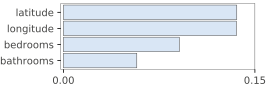

In [23]:
I = dropcol_importances(rf, X_train, y_train, X_test, y_test)
viz = plot_importances(I)
viz.save('../article/images/collinear_dropcol.svg')
viz

CPU times: user 47.4 s, sys: 1.37 s, total: 48.7 s
Wall time: 11.4 s


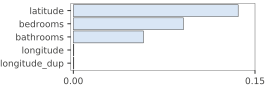

In [24]:
X_train_drop = X_train.copy()
X_train_drop['longitude_dup'] = X_train_drop.longitude
X_test_drop = X_test.copy()
X_test_drop['longitude_dup'] = X_test_drop.longitude
%time I = dropcol_importances(rf, X_train_drop, y_train, X_test_drop, y_test)
viz = plot_importances(I, label_fontsize=9)
viz.save('../article/images/collinear_dropcol_longitude_dup.svg')
viz

CPU times: user 36.3 s, sys: 1.25 s, total: 37.6 s
Wall time: 9.51 s


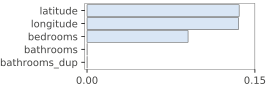

In [25]:
X_train_drop = X_train.copy()
X_train_drop['bathrooms_dup'] = X_train_drop.bathrooms
X_test_drop = X_test.copy()
X_test_drop['bathrooms_dup'] = X_test_drop.bathrooms
%time I = dropcol_importances(rf, X_train_drop, y_train, X_test_drop, y_test)
viz = plot_importances(I)
viz.save('../article/images/collinear_dropcol_bathrooms_dup.svg')
viz

## Permute importance with validation set

0.8619136880089908


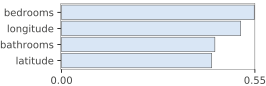

In [26]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X_train, y_train)
print(rf.oob_score_)

I = importances(rf, X_test, y_test)
viz = plot_importances(I)
viz.save('../article/images/collinear_permute.svg')
viz

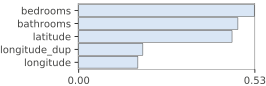

In [27]:
X_train_perm = X_train.copy()
X_train_perm['longitude_dup'] = X_train_perm.longitude
X_test_perm = X_test.copy()
X_test_perm['longitude_dup'] = X_test_perm.longitude

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X_train_perm, y_train)
I = importances(rf, X_test_perm, y_test)
viz = plot_importances(I)
viz.save('../article/images/collinear_permute_longitude_dup.svg')
viz

# Add noise to permute imp

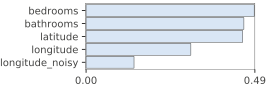

In [28]:
X_train_perm = X_train.copy()
X_train_perm['longitude_noisy'] = X_train_perm.longitude
X_test_perm = X_test.copy()
X_test_perm['longitude_noisy'] = X_test_perm.longitude

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
c = .0005
noise = np.random.random(len(X_train_perm))*c

X_train_perm['longitude_noisy'] = X_train_perm.longitude + noise
rf.fit(X_train_perm, y_train)
I = importances(rf, X_test_perm, y_test)
viz = plot_importances(I)
viz.save(f'../article/images/collinear_permute_longitude_noise_{c:.4f}.svg')
viz

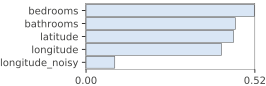

In [29]:
c = .001
X_train_perm = X_train.copy()
X_train_perm['longitude_noisy'] = X_train_perm.longitude
X_test_perm = X_test.copy()
X_test_perm['longitude_noisy'] = X_test_perm.longitude

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
noise = np.random.random(len(X_train_perm))*c

X_train_perm['longitude_noisy'] = X_train_perm.longitude + noise
rf.fit(X_train_perm, y_train)
I = importances(rf, X_test_perm, y_test)
viz = plot_importances(I)
viz.save(f'../article/images/collinear_permute_longitude_noise_{c:.4f}.svg')
viz

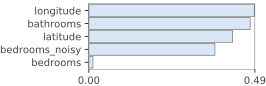

In [30]:
c = 1
X_train_perm = X_train.copy()
noise = np.random.random(len(X_train_perm))*c
X_train_perm['bedrooms_noisy'] = X_train_perm.bedrooms + noise
X_test_perm = X_test.copy()
noise = np.random.random(len(X_test_perm))*c
X_test_perm['bedrooms_noisy'] = X_test_perm.bedrooms + noise

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)

rf.fit(X_train_perm, y_train)
I = importances(rf, X_test_perm, y_test)
viz = plot_importances(I)
viz.save(f'../article/images/collinear_permute_bedrooms_noise_{c:.4f}.svg')
viz

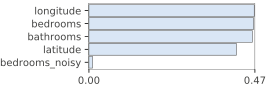

In [31]:
c = 3
X_train_perm = X_train.copy()
noise = np.random.random(len(X_train_perm))*c
X_train_perm['bedrooms_noisy'] = X_train_perm.bedrooms + noise
X_test_perm = X_test.copy()
noise = np.random.random(len(X_test_perm))*c
X_test_perm['bedrooms_noisy'] = X_test_perm.bedrooms + noise

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)

rf.fit(X_train_perm, y_train)
I = importances(rf, X_test_perm, y_test)
viz = plot_importances(I)
viz.save(f'../article/images/collinear_permute_bedrooms_noise_{c:.4f}.svg')
viz

# Gini decrease (Default importance)

In [32]:
def mkdf(columns, importances):
    I = pd.DataFrame(data={'Feature':columns, 'Importance':importances})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=False)
    return I

In [33]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

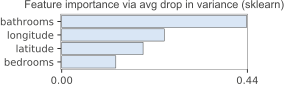

In [34]:
I = mkdf(X_train.columns,rf.feature_importances_)
viz = plot_importances(I, title="Feature importance via avg drop in variance (sklearn)")
viz.save('../article/images/collinear_dflt.svg')
viz

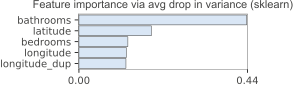

In [35]:
X_train_dflt = X_train.copy()
X_train_dflt['longitude_dup'] = X_train_dflt.longitude
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train_dflt, y_train)

I = mkdf(X_train_dflt.columns,rf.feature_importances_)
viz = plot_importances(I, title="Feature importance via avg drop in variance (sklearn)")
viz.save('../article/images/collinear_dflt_longitude_dup.svg')
viz

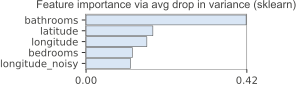

In [36]:
c = 0.0005
noise = np.random.random(len(X_train))*c

X_train_dflt = X_train.copy()
X_train_dflt['longitude_noisy'] = X_train_dflt.longitude + noise

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train_dflt, y_train)

I = mkdf(X_train_dflt.columns,rf.feature_importances_)
viz = plot_importances(I, title="Feature importance via avg drop in variance (sklearn)")
viz.save(f'../article/images/collinear_dflt_longitude_noise_{c:.4f}.svg')
viz

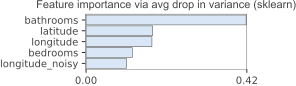

In [37]:
c = 0.001
noise = np.random.random(len(X_train))*c

X_train_dflt = X_train.copy()
X_train_dflt['longitude_noisy'] = X_train_dflt.longitude + noise

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train_dflt, y_train)

I = mkdf(X_train_dflt.columns,rf.feature_importances_)
viz = plot_importances(I, title="Feature importance via avg drop in variance (sklearn)")
viz.save(f'../article/images/collinear_dflt_longitude_noise_{c:.4f}.svg')
viz

## Cross validation

CPU times: user 10.3 s, sys: 4.82 s, total: 15.1 s
Wall time: 19.8 s


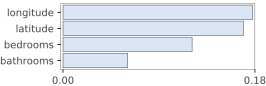

In [38]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
%time I = cv_importances(rf, X_train, y_train)
plot_importances(I)